In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Telco_Customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Inspection of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#Replace tha blank with 0 and total charges are recorded

In [4]:
df['Total Charges'] = df['Total Charges'].replace(" ","0")
df['Total Charges'] = df['Total Charges'].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df.isnull().sum().sum()

np.int64(5174)

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['CustomerID'].duplicated().sum()

np.int64(0)

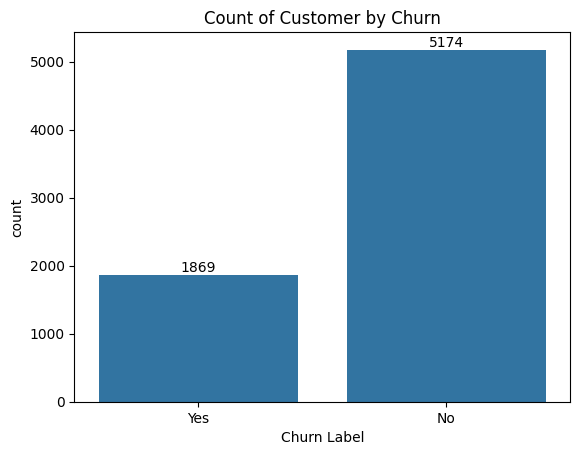

In [10]:
ax = sns.countplot(x='Churn Label', data=df)

#To get the exact data over bars
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()


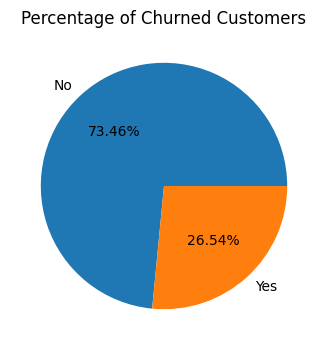

In [11]:
plt.figure(figsize=(4,4))

gb = df.groupby('Churn Label').agg({'Churn Label':'count'})
# gb


# plt.pie(df['Churn Label'])
# plt.show()

plt.pie(gb['Churn Label'], labels=gb.index, autopct='%1.2f%%')
plt.title("Percentage of Churned Customers")
plt.show()

#From the given piechart we can conclude that 26.54% of our customers have churned out.
#let's explore the reason behind it.

Explore things by different columns

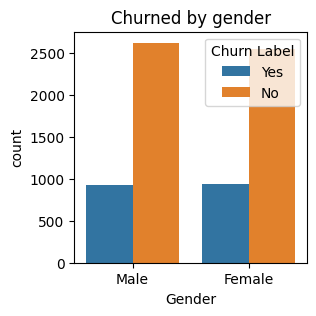

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(x='Gender', data=df, hue='Churn Label')
plt.title("Churned by gender")
plt.show()

In [13]:
# plt.figure(figsize=(3,3))
# sns.countplot(x='Senior Citizen', data=df, hue='Churn Label')
# plt.title("Churned by Senior Citizen")
# plt.show()

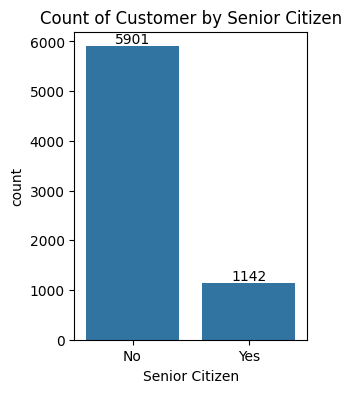

In [14]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Senior Citizen', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Senior Citizen")
plt.show()

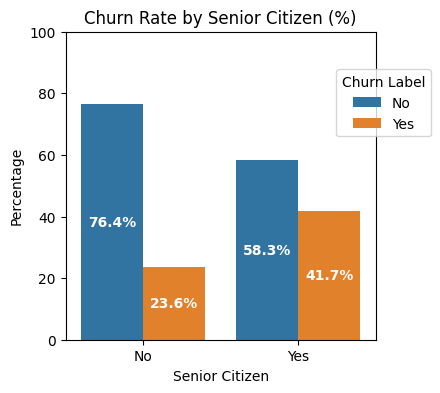

In [15]:
# Count occurrences
count_data = df.groupby(['Senior Citizen', 'Churn Label']).size().reset_index(name='Count')

# Calculate total counts per 'Senior Citizen' group
total_counts = count_data.groupby('Senior Citizen')['Count'].sum()

# Merge the total counts back to the dataframe
count_data = count_data.merge(total_counts, on='Senior Citizen', suffixes=('', '_Total'))

# Compute percentage
count_data['Percent'] = (count_data['Count'] / count_data['Count_Total']) * 100

# Create the figure
plt.figure(figsize=(4,4))

# Create stacked bar plot
ax = sns.barplot(x='Senior Citizen', y='Percent', hue='Churn Label', data=count_data)

# Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Labels and title
plt.title("Churn Rate by Senior Citizen (%)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.ylim(0, 100)  # Ensure the y-axis goes from 0 to 100
plt.legend(title="Churn Label", bbox_to_anchor = (1.2,0.9))
plt.show()

#Comparitive a greated percentage of peole in senior citizen category have churned.

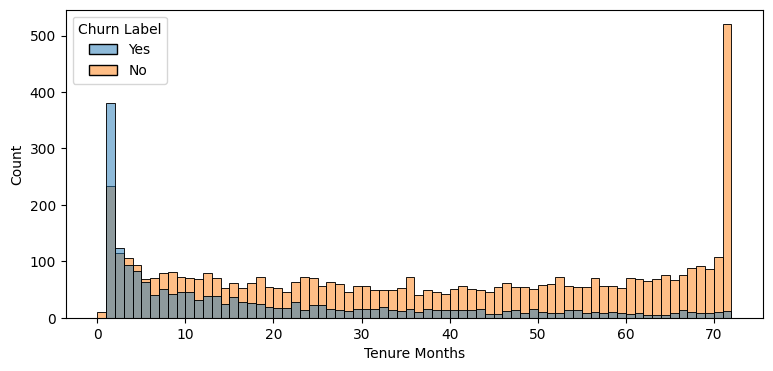

In [16]:
plt.figure(figsize = (9,4))
sns.histplot(x='Tenure Months', data=df, bins = 72, hue='Churn Label')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

In [17]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

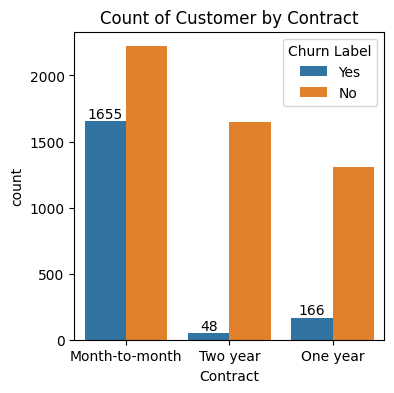

In [18]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract', data=df, hue='Churn Label')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#People who have month to month contract are likely to churn the from those who have 1 or 2 years of contract

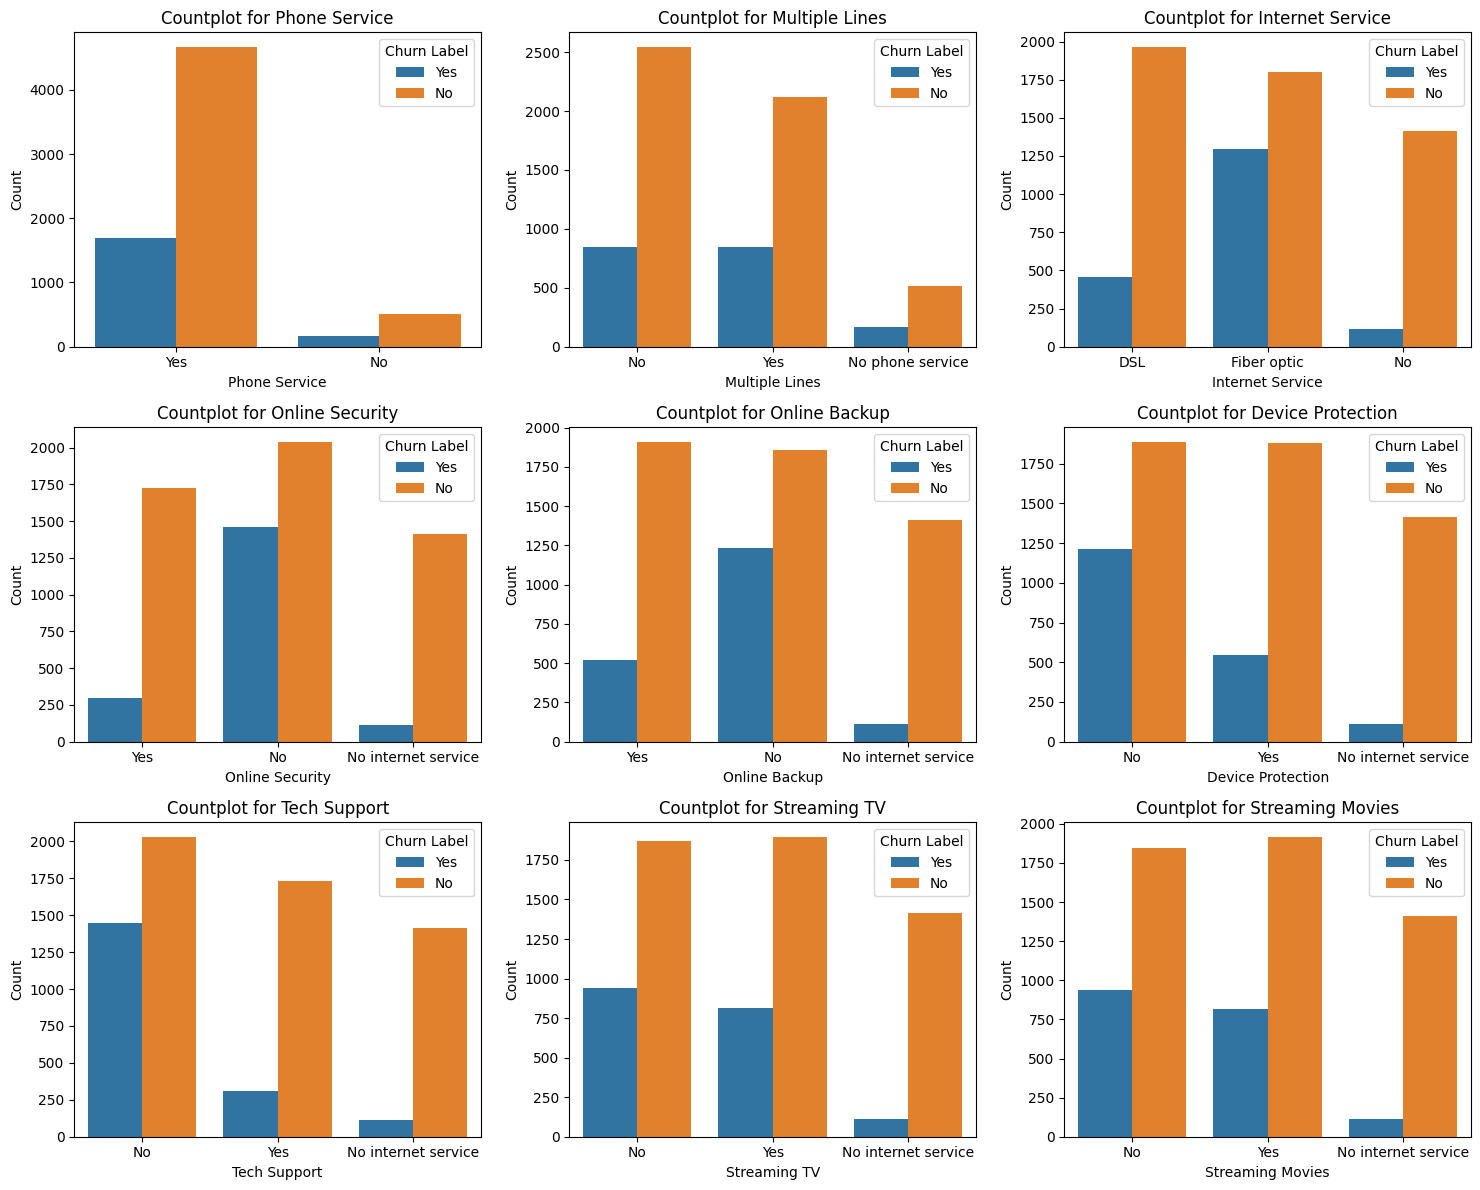

In [19]:
# List of categorical columns to plot
columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
           'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = -(-len(columns) // n_cols)  # Ceiling division to get the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))  # Adjust figure size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue='Churn Label', legend=True, ax=axes[i])  # Fix: Use hue=col
    axes[i].set_title(f"Countplot for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#The countplots show the distribution of various telecom services among customers, segmented by churn status. Customers without additional services like Online Security, Tech Support, and Device Protection tend to churn more frequently. Fiber Optic internet users also show a higher churn rate compared to DSL users. Overall, customers who opt for fewer services appear to have a higher tendency to leave.

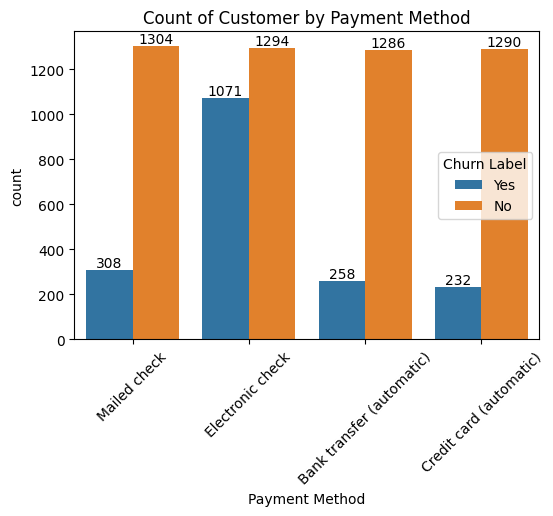

In [24]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Payment Method', data=df, hue='Churn Label')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by Payment Method")
plt.xticks(rotation=45)
plt.show()

#Customer is likely to churn when they are using electronic check as a payment method.